In [ ]:
# p199 실습
# 데이터 셋 : Titanic.csv (변수 : 12, 자료 수 : 891개)
# 목표변수 : Survived(생존여부) - Survival (0 = No, 1 = Yes)

# Pclass : 승객 등급, 1, 2, 3등석
# Name, Sex, Age : 이름, 성별, 나이
# SibSp : 함께 탑승한 형제, 배우자의 수
# Parch : 함께 탑승한 자녀, 부모의 수
# Ticket : 티켓 아이디
# Fare : 티켓 요금 (파운드)
# Cabin : 객실 번호
# Embarked : 승객이 탑승한 곳 C(Cherbourg), Q(Queenstown), S(Southampton)

# [1] 데이터 속성 및 기술통계량 확인
# [2] 목표변수 및 설명변수(범주형 / 연속형 변수별)의 분포 확인
# [3] 변수들의 결측 및 이상치 처리
# [4] 그래프 분석을 통해 변수간 관계를 확인
# [5] 생존에 영향을 미치는 잠재 인자 도출

In [8]:
import pandas as pd # 데이터 구성 패키지 : Series, DataFrame
import numpy as np # 행렬 연산 패키지
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler # Scaling 클래스
import matplotlib # 그래프 표시
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
import matplotlib
import matplotlib.font_manager

[f.name for f in matplotlib.font_manager.fontManager.ttflist if 'Nanum' in
f.name]
# ['NanumBarunGothic',
# 'NanumMyeongjo',
# 'NanumMyeongjo',
# 'NanumGothic',
# 'NanumBarunGothic',
# 'NanumGothic']

['NanumMyeongjo',
 'NanumGothic',
 'NanumBarunGothic',
 'NanumGothic',
 'NanumSquare',
 'NanumSquareRound',
 'NanumSquare',
 'NanumBarunGothic',
 'NanumSquareRound',
 'NanumMyeongjo']

In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt
# 유니코드 깨짐현상 해결
mpl.rcParams['axes.unicode_minus'] = False
# 나눔고딕 폰트 적용
plt.rcParams["font.family"] = 'NanumGothic'

In [11]:
ferry = pd.read_csv("/home/piai/다운로드/2주차 실습파일/1 Big Data 분석 기초/titanic.csv", encoding = 'euc-kr')
ferry

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


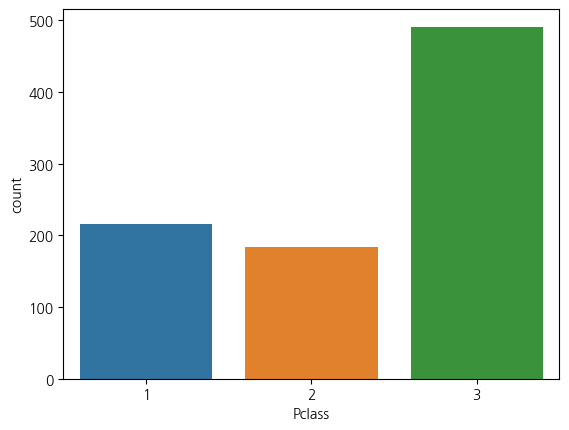

In [13]:
# bar chart 생성하기
bar_chart = sns.countplot(x='Pclass', data=ferry)
# -> countplot은 bar chart를 생성하며 x는 어떤 행의 목차를 할지 정하고, data는 불러올 파일명이다.

<Axes: xlabel='Pclass', ylabel='count'>

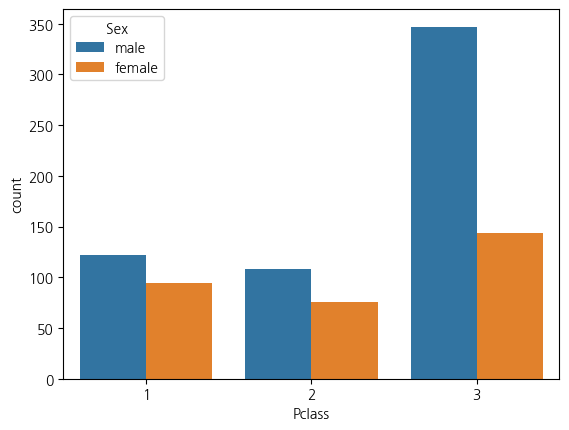

In [16]:
# bar chat 생성 등석 + 성별 출력
sns.countplot(x='Pclass', hue="Sex", data=ferry)
# -> Pclass를 기준으로 hue는 구분 기준 추가로 성별에 따라 나눠 bar chat를 만들었다.
# -> 1등석은 200명이 조금 넘는데 hue 성별로 나누면 남자 140 여자 100이하인 것을 알 수 있다.

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

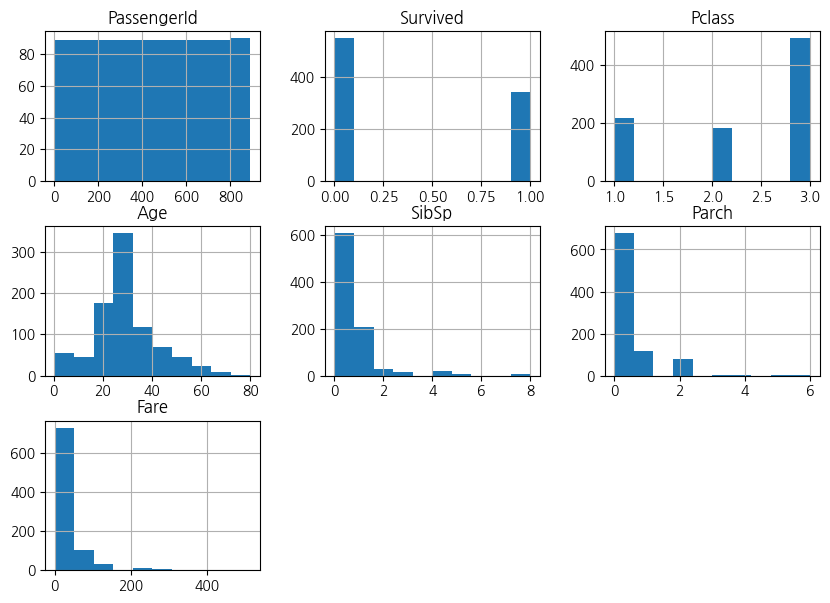

In [17]:
ferry.hist(figsize = (10, 7))
# hist(figsize) : (x축 크기, y축 크기) - 그래프 영역별 중첩 처리 
# -> 9개 열 중 2개는 문자열 데이터이고 7개는 숫자형 데이터이다.
# -> hist(figsize)는 숫자형 변수들만 한 번에 bar chart로 표현한다.

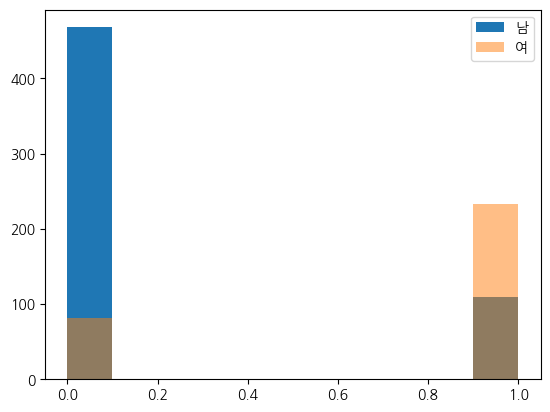

In [34]:
# matplotlib.pyplot.hist method 이용하여 중첩 histogram 생성
# hist(변수, label = "표시 값", alpha = 투명도 (0 ~ 1 지정))
man_surv = plt.hist(ferry[ferry["Sex"] == "male"]["Survived"],label = "남", alpha = 1.0)
# -> ferry의 성별 행 중 남자의 생존 유무를 bar chart로 표시하고 투명도는 1, 범주는 남으로 표시
woman_surv = plt.hist(ferry[ferry["Sex"] == "female"]["Survived"],label = "여", alpha = 0.5)
# -> ferry의 성별 행 중 여자의 생존 유무를 bar chart로 표시하고 투명도는 0.5, 범주는 여로 표시
plt.legend() # 그래프에 범주 추가하기

# 어떻게 하면 생존률을 따로 분리해서 표시할 수 있을까 고민해보기 (추후)
# 내일 질문해보기

<Axes: xlabel='Embarked', ylabel='Pclass'>

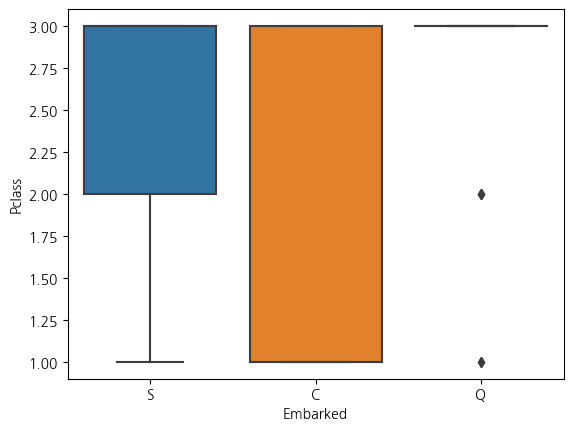

In [43]:
sns.boxplot(y = "Pclass", x = 'Embarked', data=ferry)
# -> Q에서 결측치가 추측된다.

<Axes: xlabel='Sex', ylabel='Pclass'>

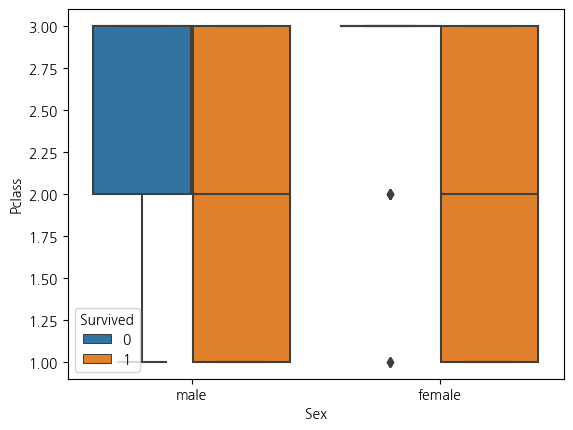

In [45]:
sns.boxplot(y = "Pclass", x = 'Sex', hue = "Survived", data=ferry)
# -> Q에서 결측치가 추측된다.

<Axes: >

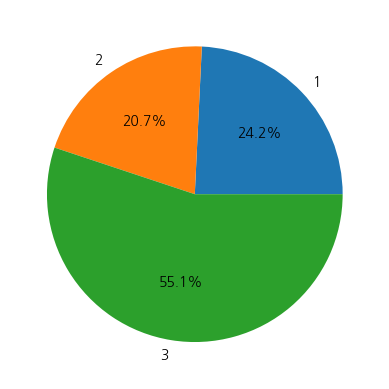

In [47]:
count = ferry.groupby(["Pclass"]).size()
# 좌석 등급 요약
count.plot.pie(y = "Survived", autopct = "%.1f%%")
# -> 요약 자료를 생존을 기준으로 소수점 1자리까지 출력


<Axes: xlabel='Survived', ylabel='Pclass'>

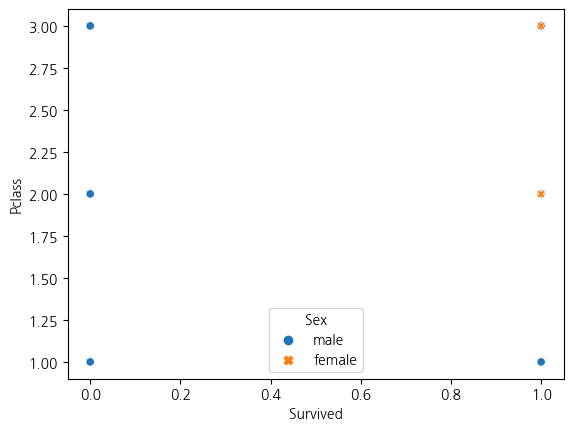

In [51]:
sns.scatterplot(x = "Survived", y = "Pclass", hue = "Sex", style = "Sex", data = ferry)

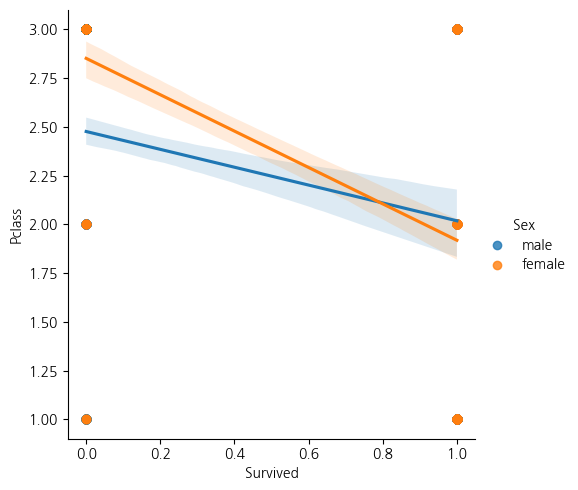

In [53]:
sns.lmplot(data = ferry, x = "Survived", y = "Pclass", hue = "Sex")

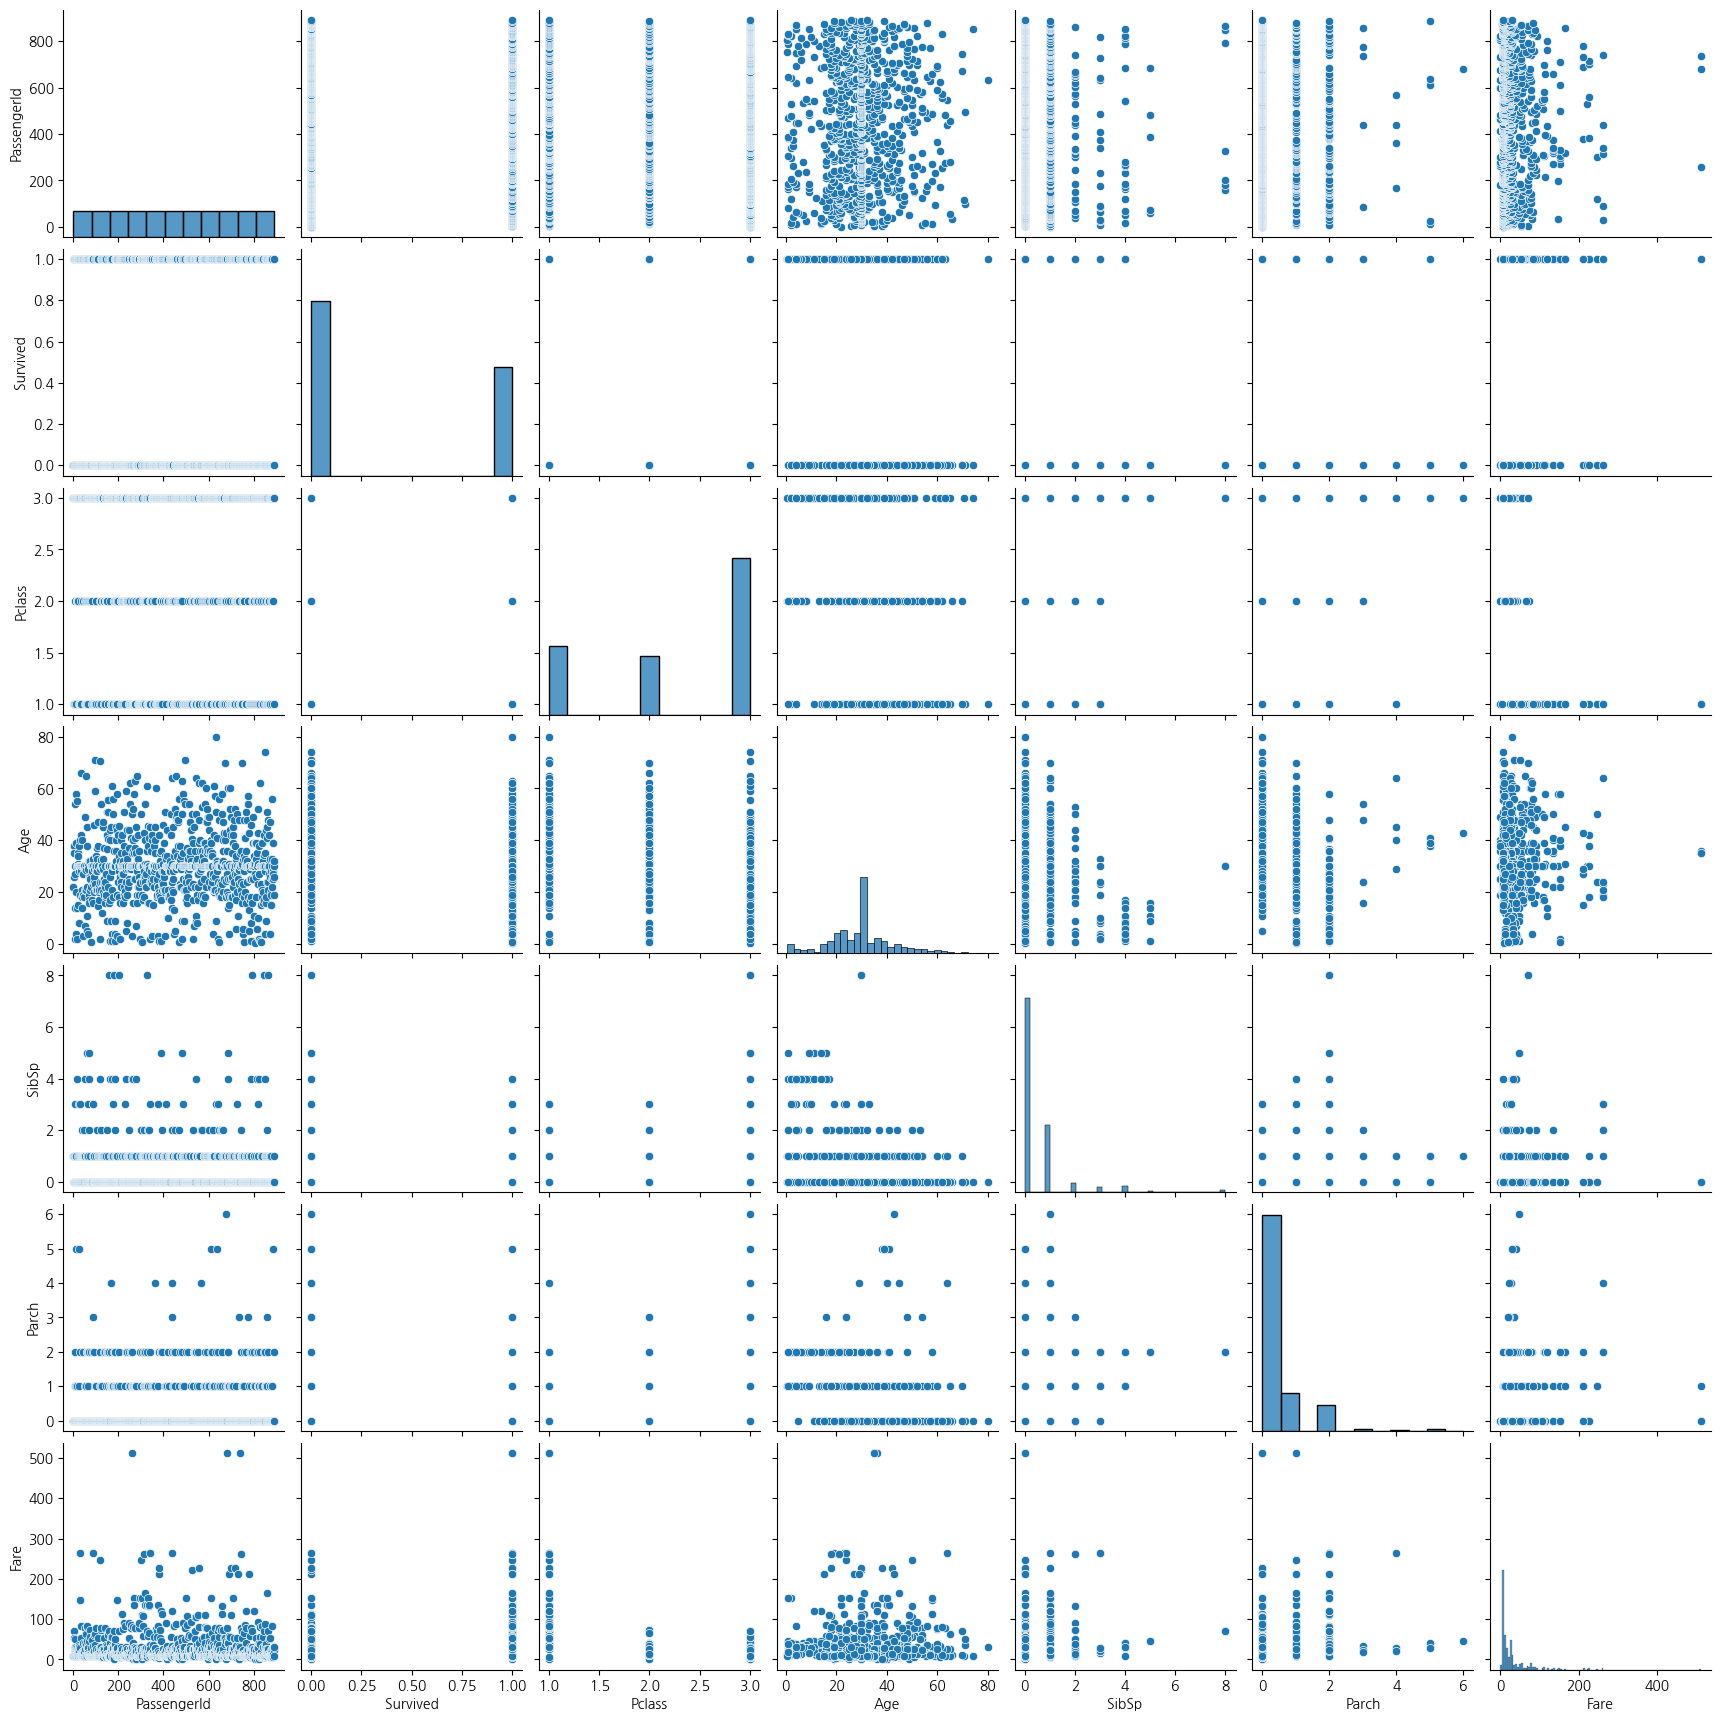

In [54]:
sns.pairplot(ferry)

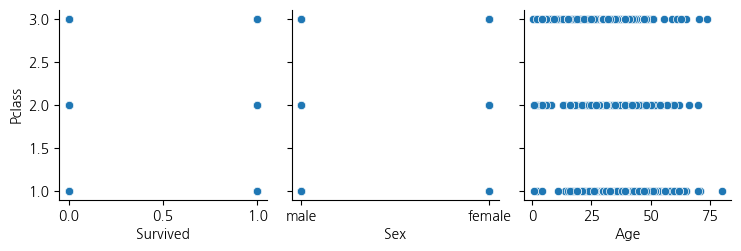

In [55]:
sns.pairplot(ferry, y_vars=["Pclass"], x_vars=["Survived", "Sex", "Age"])

/tmp/ipykernel_318643/3446404075.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_heat = heat.pivot("Sex", "Pclass", "Fare")


<Axes: xlabel='Pclass', ylabel='Sex'>

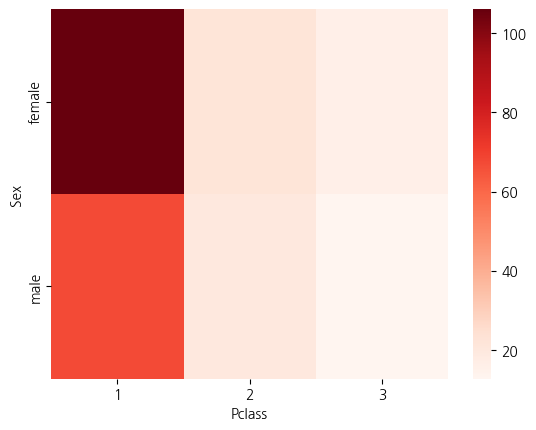

In [58]:
heat = ferry.groupby(["Sex", "Pclass"], as_index = False)['Fare'].agg("mean")
df_heat = heat.pivot("Sex", "Pclass", "Fare")
sns.heatmap(df_heat, cmap = "Reds")

/tmp/ipykernel_318643/183280589.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  check_hit = ferry.corr()


<Axes: >

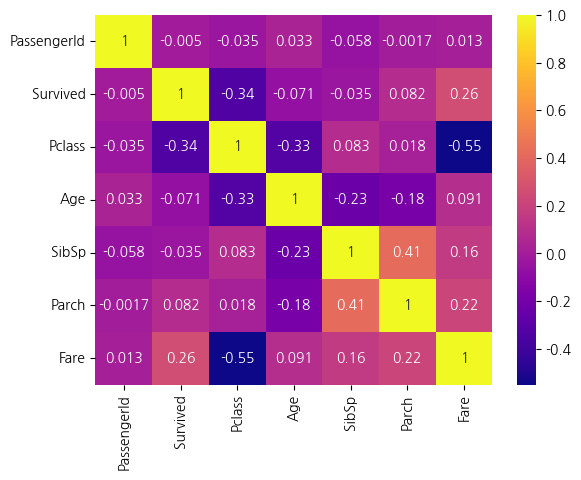

In [59]:
check_hit = ferry.corr()
sns.heatmap(check_hit, annot = True, cmap = "plasma")

/tmp/ipykernel_318643/3189199385.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data = ferry, x="Survived", y="Age", shade = True)


<Axes: xlabel='Survived', ylabel='Age'>

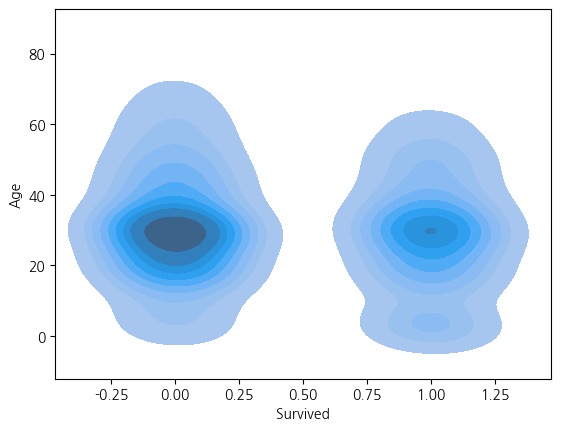

In [62]:
sns.kdeplot(data = ferry, x="Survived", y="Age", shade = True)

<Axes: >

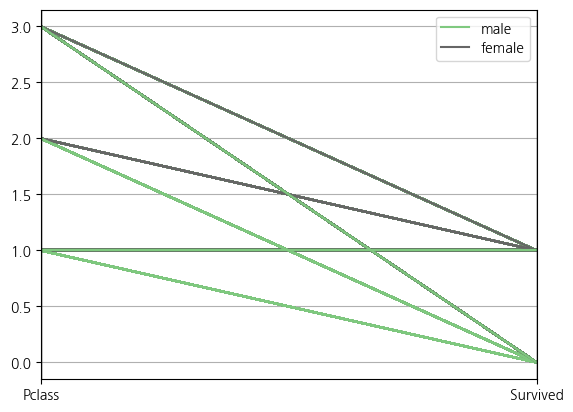

In [65]:
pd.plotting.parallel_coordinates(ferry, "Sex", cols=["Pclass", "Survived"], colormap="Accent")

Text(675.7676767676767, 0.5, '좌석 등급')

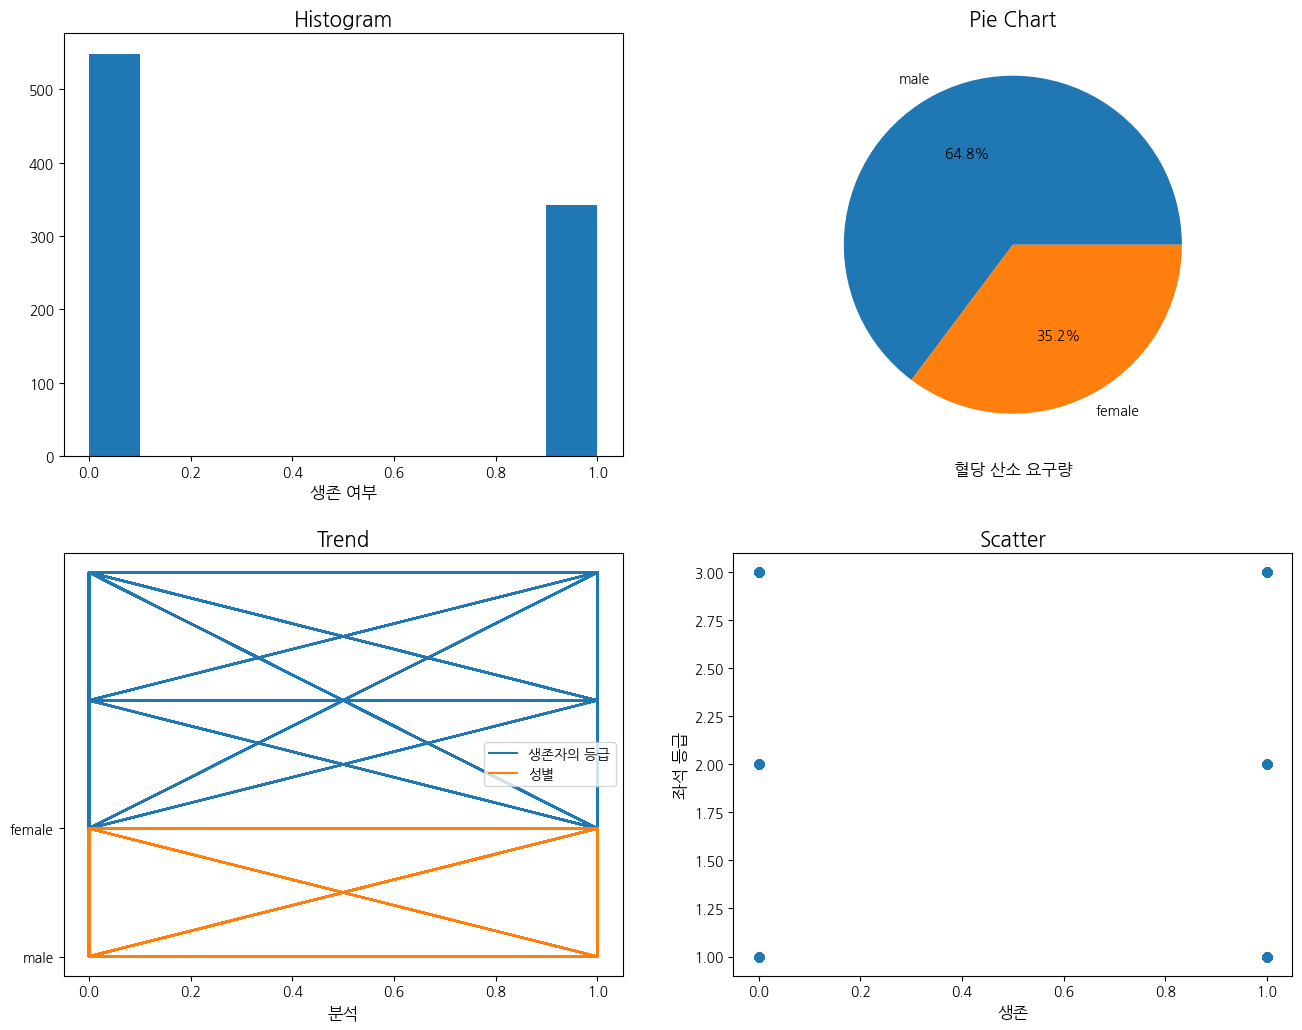

In [75]:
df_count = ferry["Sex"].value_counts()
fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (13,10)) # (2, 2) 4분할, 4개의 그래프 생성
plt.tight_layout(w_pad = 5, h_pad = 5) # w_pad : 열 사이 간격 / h_pad : 행 사이 간격

# 히스토그램
axes[0,0].hist(ferry["Survived"]) # [0,0] 위치에 그림 생성
axes[0,0].set_title("Histogram", fontsize = 15) # 제목 설정, 글자 크기 15
axes[0,0].set_xlabel("생존 여부", fontsize = 12) # x축 label 이름 지정

# 파이 차트
axes[0, 1].pie(df_count, labels = df_count.index.tolist(), autopct = "%.1f%%")
axes[0, 1].set_title("Pie Chart", fontsize = 15)
axes[0, 1].set_xlabel("혈당 산소 요구량", fontsize = 12)

# 트렌드
axes[1,0].plot("Survived", "Pclass", data = ferry, label = "생존자의 등급")
axes[1,0].plot("Survived", "Sex", data = ferry, label = "성별")
axes[1,0].set_title("Trend", fontsize = 15)
axes[1,0].set_xlabel("분석", fontsize = 12)
axes[1,0].legend()

axes[1,1].scatter("Survived", "Pclass", data = ferry)
axes[1,1].set_title("Scatter", fontsize = 15)
axes[1,1].set_xlabel("생존", fontsize = 12)
axes[1,1].set_ylabel("좌석 등급", fontsize = 12)